In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns 

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-top-tracks-2023/top_50_2023.csv


In [2]:
df=pd.read_csv('/kaggle/input/spotify-top-tracks-2023/top_50_2023.csv')
df.head()

,artist_name,track_name,is_explicit,album_release_date,genres,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature,popularity
0,Miley Cyrus,Flowers,False,2023-08-18,['pop'],0.706,0.632,0.691,-4.775,0.0584,0.000070,0.0232,0.0633,0,118.048,1,200600,4,94
1,SZA,Kill Bill,False,2022-12-08,"['pop', 'r&b', 'rap']",0.644,0.418,0.735,-5.747,0.0521,0.144000,0.1610,0.0391,8,88.980,1,153947,4,86
2,Harry Styles,As It Was,False,2022-05-20,['pop'],0.520,0.662,0.731,-5.338,0.3420,0.001010,0.3110,0.0557,6,173.930,0,167303,4,95
3,Jung Kook,Seven (feat. Latto) (Explicit Ver.),True,2023-11-03,['k-pop'],0.790,0.872,0.831,-4.185,0.3120,0.000000,0.0797,0.0440,11,124.987,1,183551,4,90
4,Eslabon Armado,Ella Baila Sola,False,2023-04-28,"['corrido', 'corridos tumbados', 'sad sierreno...",0.668,0.834,0.758,-5.176,0.4830,0.000019,0.0837,0.0332,5,147.989,0,165671,3,86


#### Data cleaning

In [3]:
df.isna().sum()

artist_name           0
track_name            0
is_explicit           0
album_release_date    0
genres                0
danceability          0
valence               0
energy                0
loudness              0
acousticness          0
instrumentalness      0
liveness              0
speechiness           0
key                   0
tempo                 0
mode                  0
duration_ms           0
time_signature        0
popularity            0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_name         50 non-null     object 
 1   track_name          50 non-null     object 
 2   is_explicit         50 non-null     bool   
 3   album_release_date  50 non-null     object 
 4   genres              50 non-null     object 
 5   danceability        50 non-null     float64
 6   valence             50 non-null     float64
 7   energy              50 non-null     float64
 8   loudness            50 non-null     float64
 9   acousticness        50 non-null     float64
 10  instrumentalness    50 non-null     float64
 11  liveness            50 non-null     float64
 12  speechiness         50 non-null     float64
 13  key                 50 non-null     int64  
 14  tempo               50 non-null     float64
 15  mode                50 non-null     int64  
 16  duration_m

In [5]:
df.shape

(50, 19)

In [6]:
df.columns

Index(['artist_name', 'track_name', 'is_explicit', 'album_release_date',
       'genres', 'danceability', 'valence', 'energy', 'loudness',
       'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'key',
       'tempo', 'mode', 'duration_ms', 'time_signature', 'popularity'],
      dtype='object')

In [7]:
len(df.columns)

19

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature,popularity
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,0.662580,0.510740,0.659880,-6.012440,0.253332,0.020542,0.161280,0.083594,5.000000,124.069500,0.560000,200458.10000,3.900000,88.100000
std,0.123089,0.212346,0.121499,1.784443,0.222188,0.093655,0.091988,0.077913,3.522522,31.396557,0.501427,32580.81077,0.303046,5.690128
min,0.445000,0.131000,0.417000,-10.613000,0.001460,0.000000,0.023200,0.025600,0.000000,67.033000,0.000000,131013.00000,3.000000,72.000000
25%,0.559500,0.344000,0.556750,-7.126000,0.086275,0.000000,0.094675,0.038950,2.000000,97.963000,0.000000,176936.75000,4.000000,85.000000
50%,0.647500,0.507000,0.678000,-5.639000,0.164500,0.000012,0.121500,0.050950,5.000000,124.983500,1.000000,199740.00000,4.000000,89.000000
75%,0.776500,0.654500,0.736500,-4.877000,0.405500,0.000263,0.227000,0.081200,7.000000,138.059750,1.000000,228219.75000,4.000000,92.750000
max,0.911000,0.893000,0.965000,-2.810000,0.830000,0.634000,0.371000,0.333000,11.000000,203.759000,1.000000,272373.00000,4.000000,99.000000


after performing tasks mentioned above it shows that our data is quite clean and doesnt have any missing values or any duplicated values so we now can proceed with analysis part

#### Data analysis

#### top 5 most popular artists

In [10]:
top_five_artists=df.groupby("artist_name").count().sort_values(by="track_name", ascending= False)["track_name"][:5]
top_five_artists

artist_name
The Weeknd      4
Taylor Swift    3
d4vd            2
SZA             2
Bad Bunny       2
Name: track_name, dtype: int64

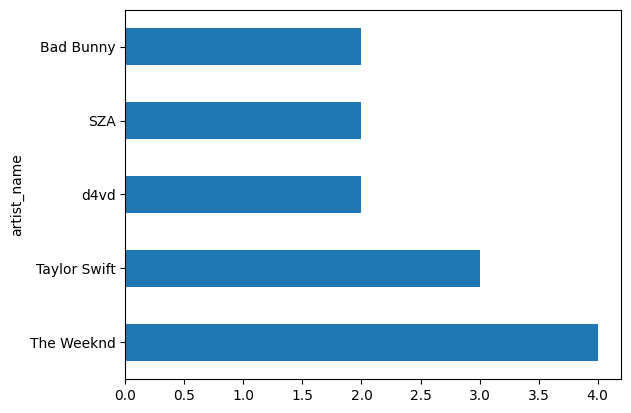

In [11]:
top_five_artists.plot.barh()
plt.show()

#### top 5 loudest tracks

In [12]:
top_5_loudest_tracks= df[["loudness","track_name"]].sort_values(by="loudness", ascending=True)[:5]
top_5_loudest_tracks

,loudness,track_name
49,-10.613,Romantic Homicide
19,-9.475,Daylight
10,-9.345,I Wanna Be Yours
26,-9.283,Here With Me
45,-9.222,See You Again (feat. Kali Uchis)


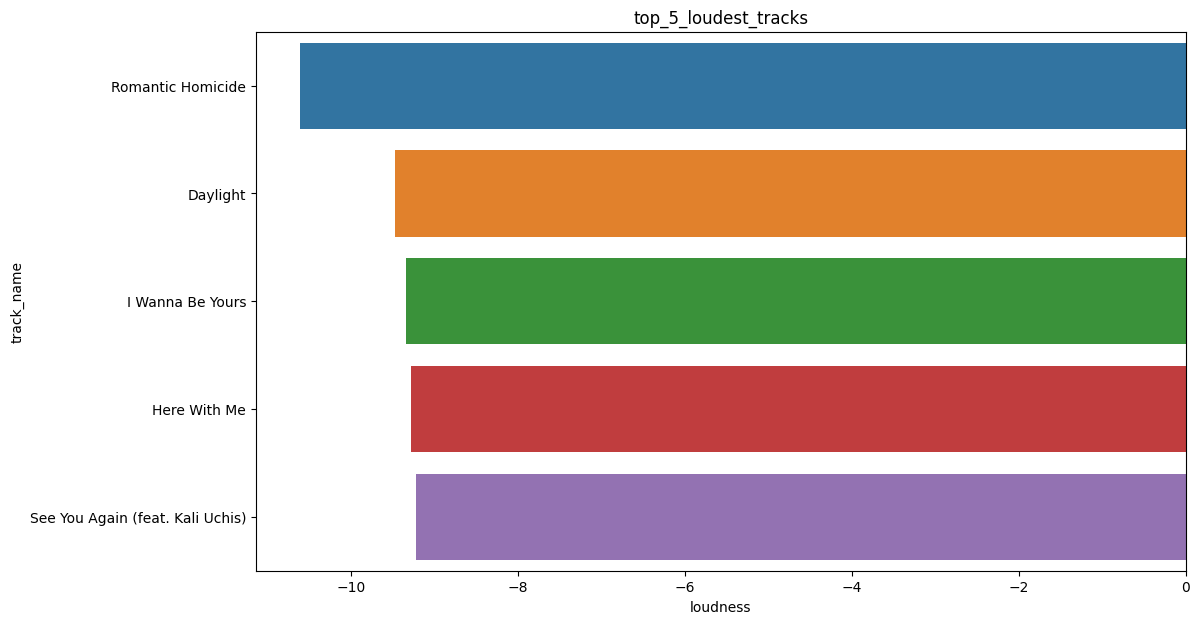

In [13]:
plt.figure(figsize=(12,7))
sns.barplot(x="loudness" ,y="track_name", data=top_5_loudest_tracks)
plt.title("top_5_loudest_tracks")
plt.show()

#### Artist with most danceability song

In [14]:
top_five_artist_with_most_danceable_songs=df[["danceability", "track_name", "artist_name"]].sort_values(by="danceability", ascending= False)[:5]
top_five_artist_with_most_danceable_songs

,danceability,track_name,artist_name
46,0.911,Me Porto Bonito,Bad Bunny
32,0.901,Hey Mor,Ozuna
34,0.864,Paint The Town Red,Doja Cat
33,0.859,CLASSY 101,Feid
17,0.835,La Bachata,Manuel Turizo


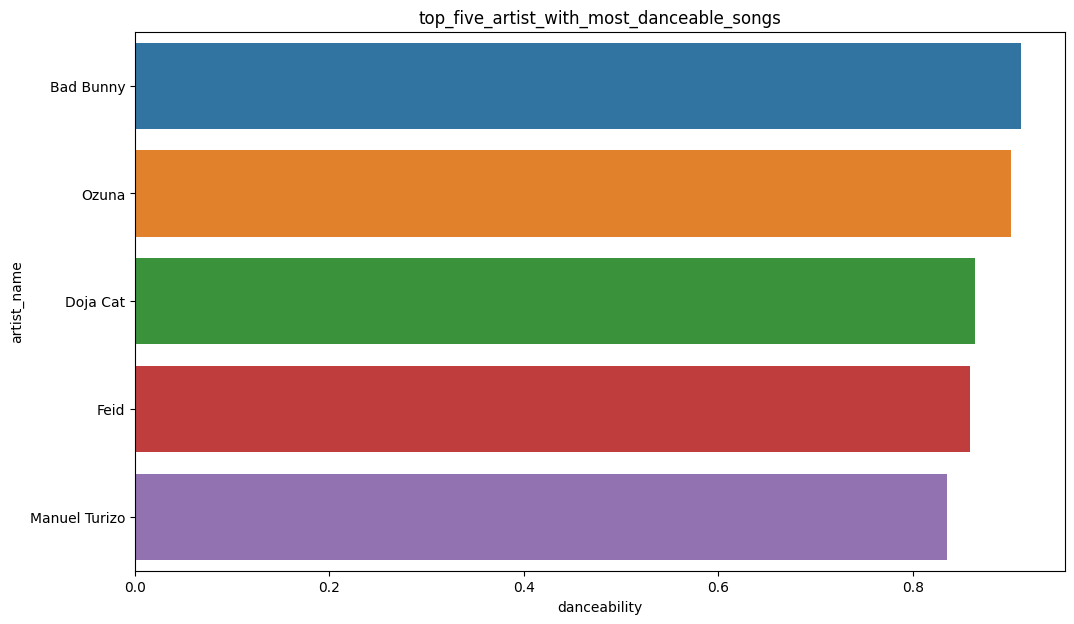

In [15]:
plt.figure(figsize=(12,7))
sns.barplot(x="danceability" ,y="artist_name", data=top_five_artist_with_most_danceable_songs)
plt.title("top_five_artist_with_most_danceable_songs")
plt.show()

In [16]:
top_5_instrumental_songs=df[["instrumentalness", "track_name", "artist_name"]].sort_values(by="instrumentalness", ascending= False)[:5]
top_5_instrumental_songs

,instrumentalness,track_name,artist_name
39,0.634,WHERE SHE GOES,Bad Bunny
28,0.162,golden hour,JVKE
1,0.144,Kill Bill,SZA
31,0.033,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap
10,0.022,I Wanna Be Yours,Arctic Monkeys


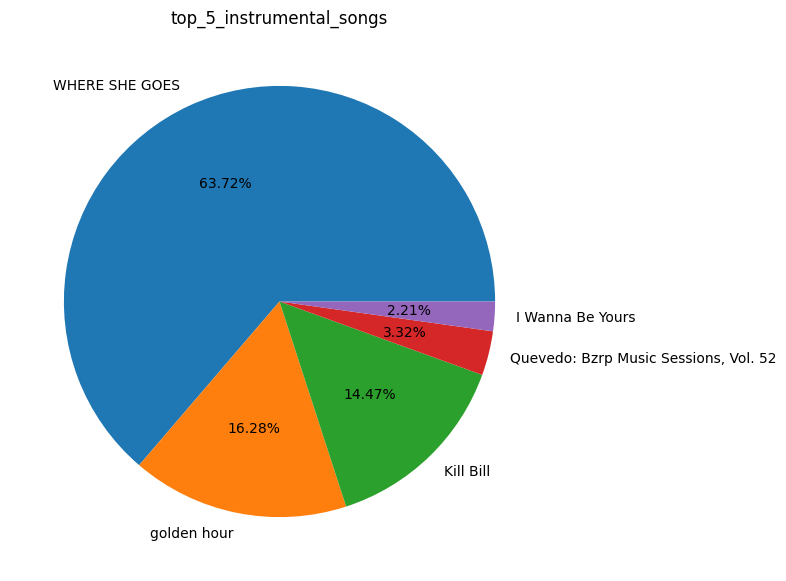

In [17]:

plt.figure(figsize=(12,7))
plt.pie(x="instrumentalness", data= top_5_instrumental_songs,autopct= '%1.2f%%',labels=top_5_instrumental_songs.track_name)
plt.title("top_5_instrumental_songs")
plt.show()

#### Explicit content distribution

In [18]:
labels = ['True' , 'False']
explicit_content  = df['is_explicit'].value_counts().reset_index()
explicit_content

,is_explicit,count
0,False,28
1,True,22


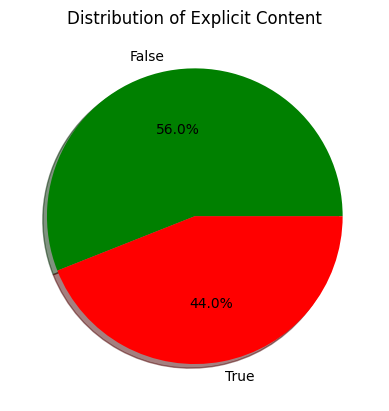

In [19]:
plt.pie(explicit_content['count'] , labels = explicit_content['is_explicit'] ,autopct='%1.1f%%',shadow = True , colors = [
    'green',
    'red',  
])
plt.title('Distribution of Explicit Content')
plt.show()

#### most popular genres

In [20]:
most_popular_genres=df[["genres"]].value_counts()[:5]
most_popular_genres                      

genres                                              
['pop']                                                 6
['canadian contemporary r&b', 'canadian pop', 'pop']    4
['bedroom pop']                                         3
['reggaeton', 'trap latino', 'urbano latino']           3
['pop', 'r&b', 'rap']                                   2
Name: count, dtype: int64

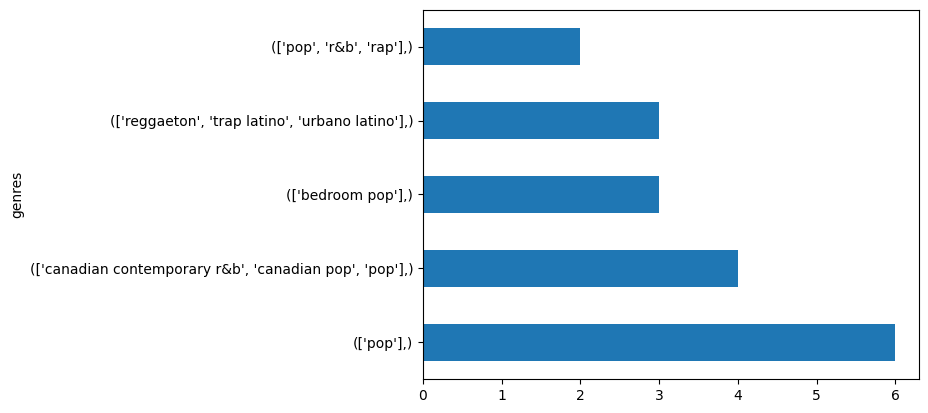

In [21]:
most_popular_genres.plot.barh()
plt.show()